## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 999)

## Exploratory Data Anaylsis 
- How will we handle missing values? 
- How to deal with outliers?
- Does any of the features look skewed? Should we transform them using Box-Cox, log, sqrt?
- Which variables should we dummify?
- Quick correlation plots. Variables with high corrleation to prices should be prioritized as predictors
- How to deal with multi-collinearity?

In [2]:
#import datasets
train_df = pd.read_csv('./Data/train.csv')

In [3]:
train_df.shape  

(1460, 81)

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#check percentage of columns with most missing values
train_df[train_df.isnull().any(axis=1)]
null_values = {}
null_percent = {}

for element in train_df.columns:
    null_values[element] = train_df[element].isna().sum()
    null_percent[element] = train_df[element].isna().sum()/train_df[[element]].shape[0]*100

null = pd.DataFrame(sorted(null_percent.items(), key=lambda x: x[1], reverse=True), columns = ['Features', 'Null_Percent'])
null.head(15)

,Features,Null_Percent
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,FireplaceQu,47.260274
5,LotFrontage,17.739726
6,GarageType,5.547945
7,GarageYrBlt,5.547945
8,GarageFinish,5.547945
9,GarageQual,5.547945


In [7]:
#drop columns with greater than 80% missing values
train_df.drop(['MiscFeature', 'Id'], axis=1, inplace=True)

LotFrontage mean is: 70.05


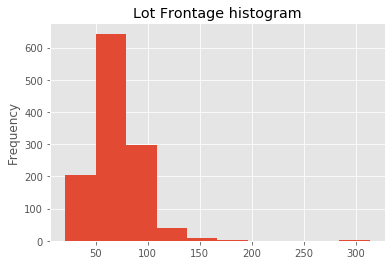

In [8]:
#LotFrontage Imputation
train_df[train_df['LotFrontage'].isna()]
print('LotFrontage mean is: %.2f' %train_df['LotFrontage'].mean())
train_df['LotFrontage'].plot(kind = 'hist')
plt.title('Lot Frontage histogram')
# Since the mean 70.05 seems to match well with the histogram, we can impute the missing values with the mean
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())

In [9]:
# MasVnrType imputation
train_df[train_df['MasVnrType'].isna()]
train_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

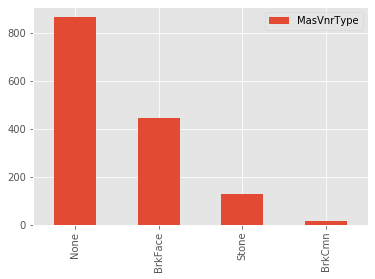

In [10]:
pd.DataFrame(train_df['MasVnrType'].value_counts()).plot(kind = 'bar')
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')

Masonry veneer area mean is: 103.69


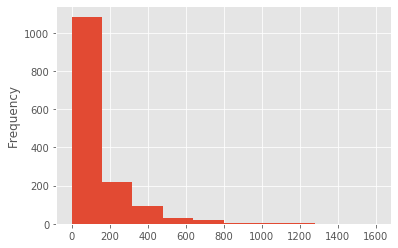

In [11]:
train_df[train_df['MasVnrArea'].isna()]
print('Masonry veneer area mean is: %.2f' %train_df['MasVnrArea'].mean())
# None means no Mason Veneer Area, therefore impute to 0
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
train_df['MasVnrArea'].plot(kind = 'hist')

Index(['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence'],
      dtype='object')


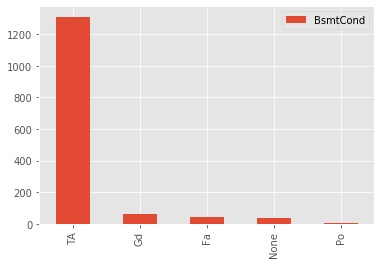

In [12]:
print(train_df.columns[train_df.isnull().any(axis=0)])
#Na for Basement quality refers to no basement, so we shouldn't impute / 37 no basements 
train_df['BsmtQual'].isna().sum()
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('None')

# impute 'None' for no basement
train_df['BsmtCond'].isna().sum() 
train_df['BsmtCond'] = train_df['BsmtCond'].fillna('None')
pd.DataFrame(train_df['BsmtCond'].value_counts()).plot(kind = 'bar')

In [13]:
# Impute Basement Variables
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna('None')
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('None')
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna('None')

### Categorical Features 
    - dummiyfying 

In [14]:
#Binary categorical features
train_df["CentralAir"] = np.where(train_df["CentralAir"].str.contains("Y"), 1, 0)
train_df["PavedDrive"] = np.where(train_df["PavedDrive"].str.contains("Y"), 1, 0)

In [15]:
nominal = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', \
           'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','Heating', \
           'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType']

ordinal = ['LotShape', 'LandSlope', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',\
           'BmstExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual', 'Functional', \
           'FireplaceQu', 'GarageQual', 'GarageCond', 'SaleCondition']

In [16]:
# # encode nominal variables
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# for column in nominal:
#     train_df[column] = label_encoder.fit_transform(train_df[column])
# train_df.head()

In [17]:
# # encode ordinal variables
# ordinal
# ordinalEncode = {"LotShape": {"Reg": 0, "IR1": 1,"IR2": 2, "IR3": 3},
#                 "LandSlope": {"Gtl": 0, "Mod": 1, "Sev": 2},
#                 "BldgType": {"TwnhsI":1, "TwnhsE":1, "Twnhs":1, "Duplx":2, "Duplex":2, "2FmCon":3, "2fmCon":3,\
#                              "1Fam": 4},
#                 "HouseStyle": {"1Story": 1, "1.5Fin": 3, "1.5Unf": 2,"2Story": 3, "2.5Fin": 5, "2.5Unf": 4,\
#                               "SFoyer": 6, "SLvl": 7},
#                  "HeatingQC": {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
#                  "ExterQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
#                  "ExterCond": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
#                  "BsmtQual": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
#                  "BsmtCond": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
#                  "BsmtExposure": {"None":0, "No":1, "Mn": 2, "Av": 3, "Gd":4},
#                  "BsmtFinType1": {"None":0, "Unf":1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ":5, "GLQ":6},
#                  "BsmtFinType2": {"None":0, "Unf":1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ":5, "GLQ":6},
#                  "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd":4, "Ex":5},
#                  "Functional": {"Sal":0, "Sev":1, "Maj2":2, "Maj1":3, "Mod": 4, "Min2": 5, "Min1":6, "Typ":7},
#                  "FireplaceQu": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
#                  "GarageQual": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
#                  "GarageCond": {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5},
#                  "SaleCondition": {"Partial":0, "Family":1, "Alloca":2, "AdjLand":3, "Abnorml":4, "Normal":5} 
#                 }

# train_df = train_df.replace(ordinalEncode)

## Create Potential New Features

#### LogSalePrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

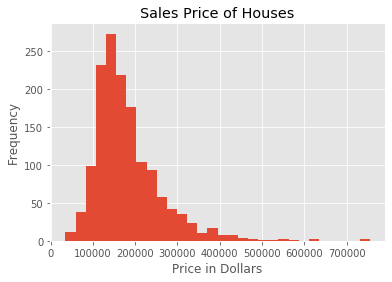

In [18]:
train_df['SalePrice'].plot.hist(bins=30)
plt.xlabel('Price in Dollars')
plt.title('Sales Price of Houses')

train_df['SalePrice'].describe()

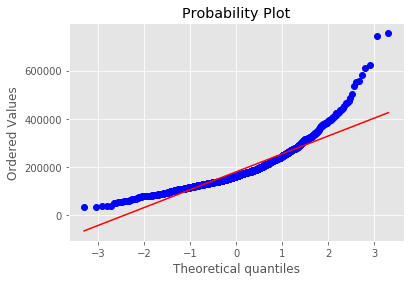

In [19]:
res = stats.probplot(train_df['SalePrice'], plot=plt)

- There is a right skewed distribution for SalesPrice target variable.
- Change into log transformation for a linear model

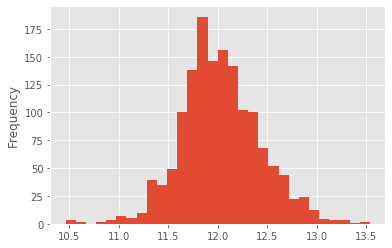

In [20]:
#log transformation
train_df['LogSalePrice'] = np.log(train_df['SalePrice'])
train_df['LogSalePrice'].plot.hist(bins=30)

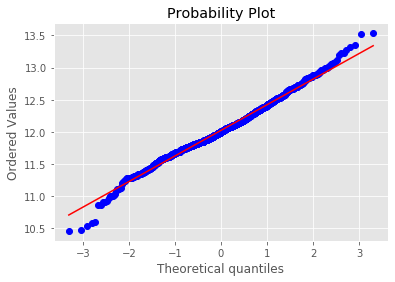

In [21]:
res = stats.probplot(train_df['LogSalePrice'], plot=plt)

#### Total Outdoor Area: Total_OutdoorSF
    - total Porch and WoodDeck Area

In [22]:
train_df['Total_OutdoorSF'] = train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['OpenPorchSF'] + train_df['ScreenPorch']+ train_df['WoodDeckSF']

# Correlation Matrix

In [109]:
corr = train_df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

High correlation between:
- TotalBsmtSF and 1stFlrSF
- GrLivArea and TotRmsAbvGrd
- GarageCars and GarageArea

In [110]:
corr[corr['SalePrice'] > 0.4]['SalePrice'].sort_values(ascending=False)
pd.DataFrame(corr[corr['SalePrice'] > 0.4]['SalePrice'].sort_values(ascending=False))

,SalePrice
SalePrice,1.000000
LogSalePrice,0.948374
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723


## Create Functions for EDA

In [23]:
def categorical(df, col_name):
    """
    Input Parameters:
    - df: dataframe
    - col_name: name of column 
    
    Returns the count of missing values, frequency of each unique value, 
    and a barplot of mean LogSalePrice for each unique value.
    """
    print("Missing Values Count: ", df[col_name].isna().sum())
    print("\nUnique values and frequency:")
    print(df[col_name].value_counts(sort = True))
    print("\nMean LogSalePrice in different groups of",col_name)
    cat_group = df.groupby(col_name)['LogSalePrice'].mean().sort_values(ascending=False)
    cat_group.plot.bar(x=col_name,y='LogSalePrice')
    plt.xlabel(col_name)
    plt.ylabel('LogSalePrice')
    plt.ylim(min(cat_group.values) - 0.3, max(cat_group.values) + 0.3)

In [24]:
def outliers(df, col_name, stdev_lim):
    """
    Input Parameters: 
    - df: dataframe 
    - col_name: the name of the column 
    - stdev_lim: the standard deviation limit/threshold used to determine outliers 
    
    Returns a list of index that contains outliers defined by the stdev_threshold
    """
    mask = np.abs(df[col_name] - df[col_name].mean()) >= (stdev_lim *df[col_name].std())
    return df.index[mask].tolist()

In [25]:
def continuous(df, col_name):
    """
    Input Parameters:
    - df: dataframe
    - col_name: name of column 
    
    Returns the count of missing values, statistic summary, 
    correlations with target variables before and after removing outliers,
    distribution of the column, and a scatter plot of LogSalePrice vs the variable. 
    """
    print("Missing Values Count: ", df[col_name].isna().sum())
    print("\nStatistical summary:")
    print(df[col_name].describe())
    lis = outliers(df,col_name,stdev_lim = 4)
    init_corr = df[col_name].corr(df["LogSalePrice"])
    post_corr = df[col_name].drop(lis).corr(df["LogSalePrice"])
    print("\nNumber of outliers removed:" + str(len(lis))) 
    print("\nCorrelation with LogSalePrice before and after removing outliers are: %.2f and %.2f, respectively." %(init_corr,post_corr))  
    df[col_name].drop(lis).plot.hist(color = 'green')
    df.drop(lis).plot.scatter( x = col_name, y ='LogSalePrice',color = 'green')

In [26]:
def cat_null_convert(df,col_name):
    """
    Input Parameters:
    - df:dataframe
    - col_name: name ofcolumn 
    
    Function converts missing value to string 'None' and returns modified data frame.
    """
    df_copy = df.copy()
    df_copy.loc[df_copy[col_name].isnull(),col_name] = 'None'
    return df_copy

## Feature 1: MSSubClass
    - Identifies the type of dwelling involved in the sale.

Missing Values Count:  0

Unique values and frequency:
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Mean LogSalePrice in different groups of MSSubClass


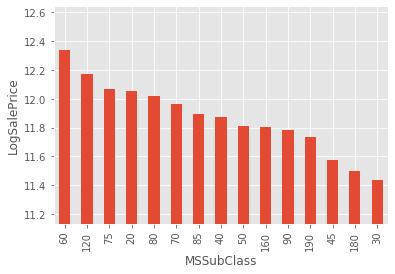

In [27]:
categorical(train_df, "MSSubClass")

# Feature 2: MsZoning
    - Identifies the general zoning classification of the sale.

Missing Values Count:  0

Unique values and frequency:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Mean LogSalePrice in different groups of MSZoning


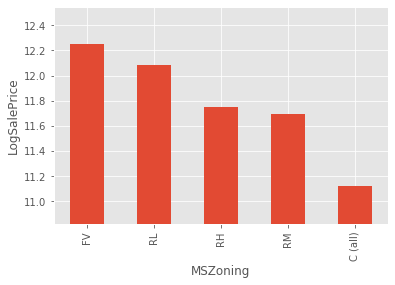

In [28]:
categorical(train_df, "MSZoning")

# Feature 3: LotFrontage
    - Linear feet of street connected to property

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

Number of outliers removed:7

Correlation with LogSalePrice before and after removing outliers are: 0.34 and 0.35, respectively.


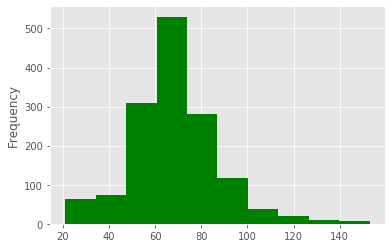

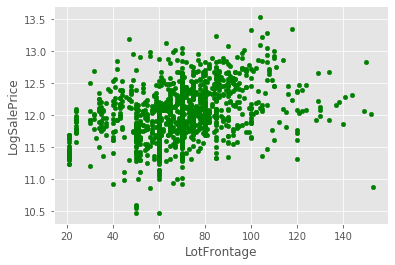

In [29]:
continuous(train_df, "LotFrontage")

# Variable 4:LotArea
   - Lot size in square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

Number of outliers removed:7

Correlation with LogSalePrice before and after removing outliers are: 0.34 and 0.35, respectively.


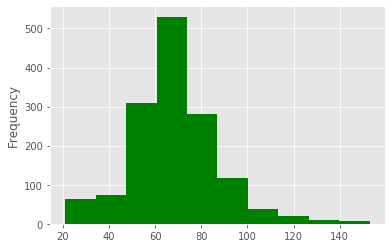

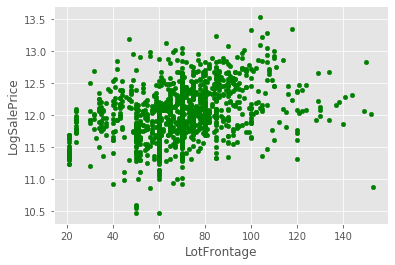

In [30]:
continuous(train_df, "LotFrontage")

# Variable 5: Street
    - Type of road access to property

       Grvl	Gravel	
       Pave	Paved

Missing Values Count:  0

Unique values and frequency:
Pave    1454
Grvl       6
Name: Street, dtype: int64

Mean LogSalePrice in different groups of Street


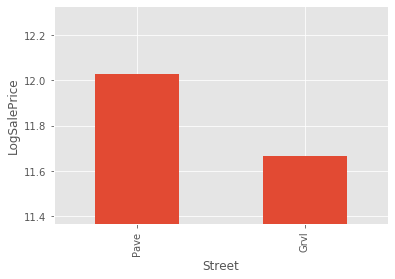

In [31]:
categorical(train_df, "Street")

# Variable 6: Alley
    - Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

Missing Values Count:  1369

Unique values and frequency:
Grvl    50
Pave    41
Name: Alley, dtype: int64

Mean LogSalePrice in different groups of Alley


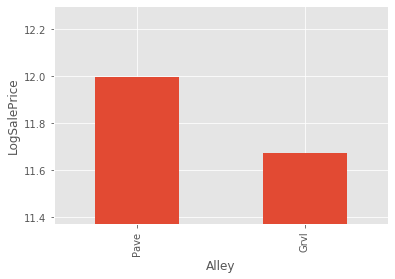

In [32]:
categorical(train_df, "Alley")

# Variable 7: LotShape
    - General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

Missing Values Count:  0

Unique values and frequency:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Mean LogSalePrice in different groups of LotShape


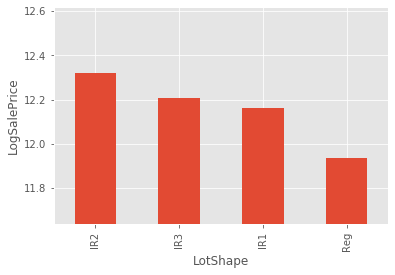

In [33]:
categorical(train_df, "LotShape")

# Variable 8: LandContour
    - Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Missing Values Count:  0

Unique values and frequency:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Mean LogSalePrice in different groups of LandContour


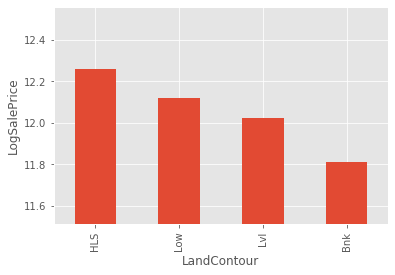

In [34]:
categorical(train_df, "LandContour")

# Variable 9: Utilities 
    - Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

Missing Values Count:  0

Unique values and frequency:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Mean LogSalePrice in different groups of Utilities


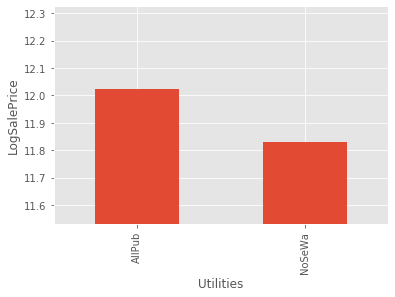

In [35]:
categorical(train_df, "Utilities")

# Variable 10: LotConfig
    - Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

Missing Values Count:  0

Unique values and frequency:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Mean LogSalePrice in different groups of LotConfig


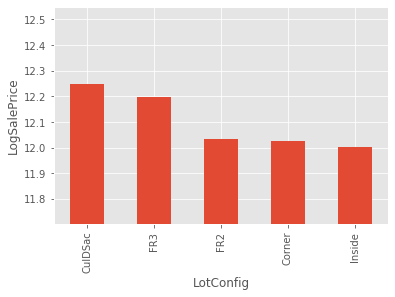

In [36]:
categorical(train_df, "LotConfig")

# Variable 11: LandSlope
    - Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Missing Values Count:  0

Unique values and frequency:
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Mean LogSalePrice in different groups of LandSlope


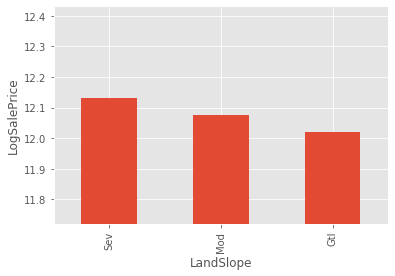

In [37]:
categorical(train_df, "LandSlope")

# Variable 12: Neighborhood
    - Physical locations within Ames city limits

Missing Values Count:  0

Unique values and frequency:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Mean LogSalePrice in different groups of Neighborhood


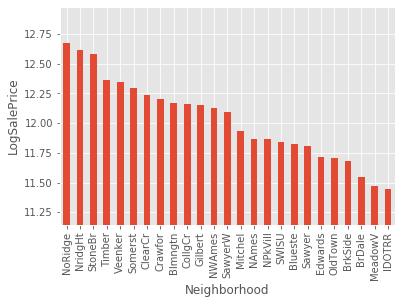

In [38]:
categorical(train_df, "Neighborhood")

# Variable 13: Condition1
    - Proximity to various conditions

Missing Values Count:  0

Unique values and frequency:
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Mean LogSalePrice in different groups of Condition1


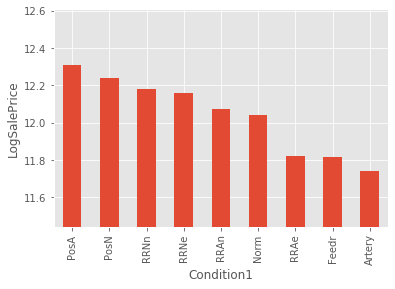

In [39]:
categorical(train_df, "Condition1")

# Variable 14: Condition 2
    - Proximity to various conditions (if more than one is present)

Missing Values Count:  0

Unique values and frequency:
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

Mean LogSalePrice in different groups of Condition2


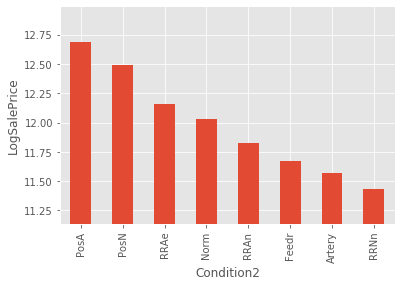

In [40]:
categorical(train_df, "Condition2")

# Variable 15: BldgType
    - Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
    

Missing Values Count:  0

Unique values and frequency:
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Mean LogSalePrice in different groups of BldgType


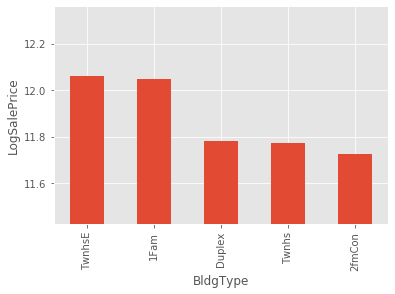

In [41]:
categorical(train_df, "BldgType")

# Variable 16: HouseStyle
    - Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Missing Values Count:  0

Unique values and frequency:
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Mean LogSalePrice in different groups of HouseStyle


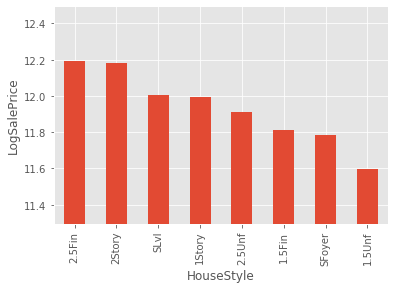

In [42]:
categorical(train_df, "HouseStyle")

# Variable 17: OverallQual
    - Rates the overall material and finish of the house


Missing Values Count:  0

Unique values and frequency:
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

Mean LogSalePrice in different groups of OverallQual


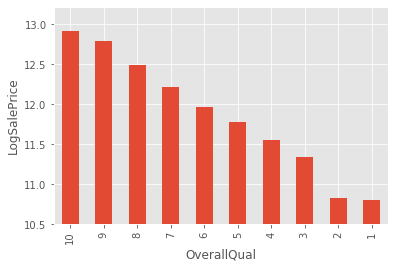

In [43]:
categorical(train_df, "OverallQual")

# Variable 18: OverallCond
    - Rates the overall condition of the house

Missing Values Count:  0

Unique values and frequency:
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

Mean LogSalePrice in different groups of OverallCond


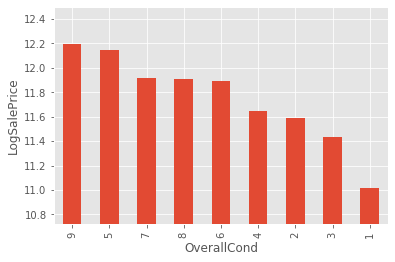

In [44]:
categorical(train_df, "OverallCond")

# Variable 19: YearBuilt 
    - Original construction date

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

Number of outliers removed:0

Correlation with LogSalePrice before and after removing outliers are: 0.59 and 0.59, respectively.


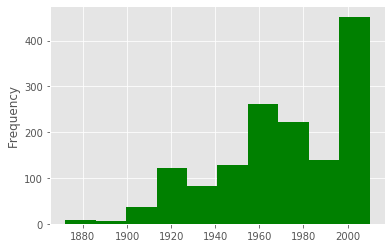

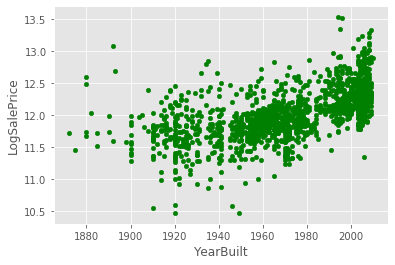

In [45]:
continuous(train_df, "YearBuilt")

# Variable 20: YearRemodAdd
    - Remodel date (same as construction date if no remodeling or additions)


Missing Values Count:  0

Statistical summary:
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

Number of outliers removed:0

Correlation with LogSalePrice before and after removing outliers are: 0.57 and 0.57, respectively.


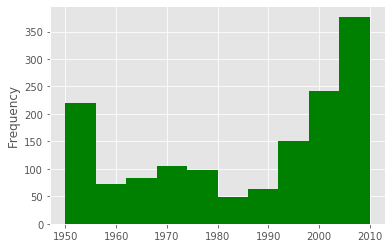

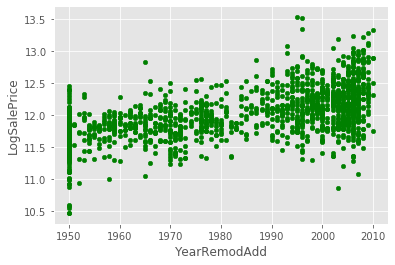

In [46]:
continuous(train_df, "YearRemodAdd")

# Variable 21: RoofStyle
    - Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

Missing Values Count:  0

Unique values and frequency:
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

Mean LogSalePrice in different groups of RoofStyle


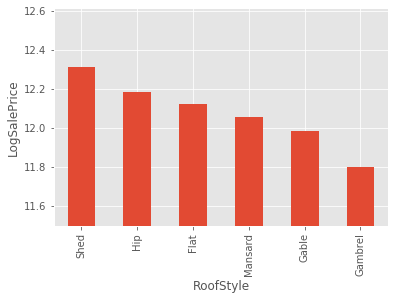

In [47]:
categorical(train_df, "RoofStyle")

# Variable 22: RoofMatl
    - Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Missing Values Count:  0

Unique values and frequency:
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64

Mean LogSalePrice in different groups of RoofMatl


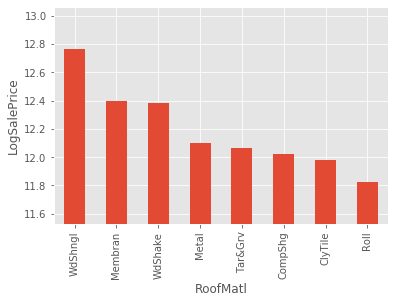

In [48]:
categorical(train_df, "RoofMatl")

# Variable 23: Exterior1st
    - Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Missing Values Count:  0

Unique values and frequency:
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

Mean LogSalePrice in different groups of Exterior1st


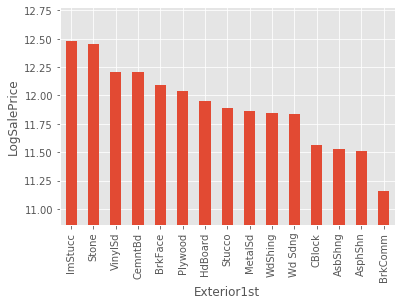

In [49]:
categorical(train_df, "Exterior1st")

# Variable 24: Exterior2nd
    - Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Missing Values Count:  0

Unique values and frequency:
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

Mean LogSalePrice in different groups of Exterior2nd


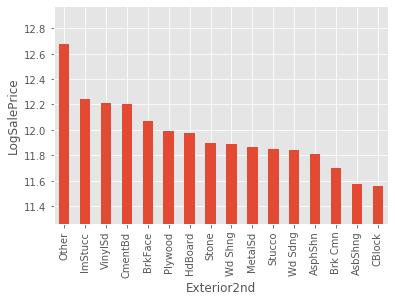

In [50]:
categorical(train_df, "Exterior2nd")

# Variable 25: MasVnrType
    - Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

Missing Values Count:  0

Unique values and frequency:
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Mean LogSalePrice in different groups of MasVnrType


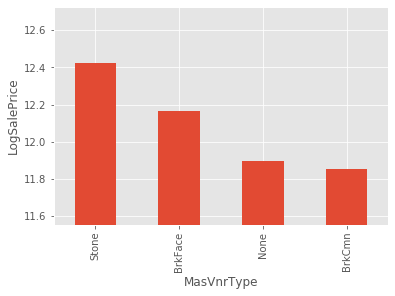

In [51]:
categorical(train_df, "MasVnrType")

# Variable 26: MasnVnrArea
    - Masonry veneer area in square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

Number of outliers removed:13

Correlation with LogSalePrice before and after removing outliers are: 0.43 and 0.41, respectively.


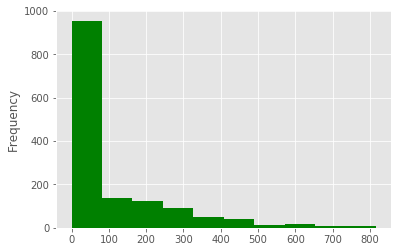

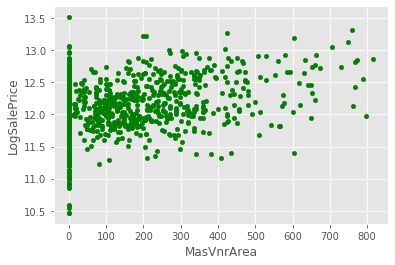

In [52]:
continuous(train_df, "MasVnrArea")

# Variable 27: ExterQual
    - Evaluates the quality of the material on the exterior 

Missing Values Count:  0

Unique values and frequency:
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

Mean LogSalePrice in different groups of ExterQual


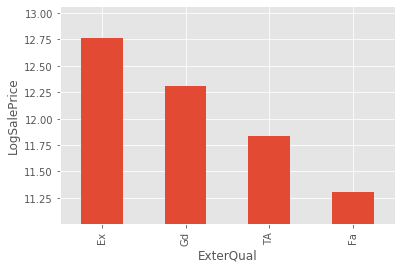

In [53]:
categorical(train_df, "ExterQual")

# Variable 28: ExterCond
    - Evaluates the present condition of the material on the exterior

Missing Values Count:  0

Unique values and frequency:
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

Mean LogSalePrice in different groups of ExterCond


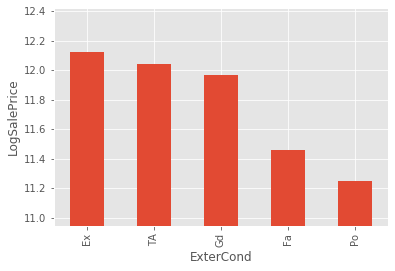

In [54]:
categorical(train_df, "ExterCond")

# Variable 29: Foundation
    - Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

Missing Values Count:  0

Unique values and frequency:
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

Mean LogSalePrice in different groups of Foundation


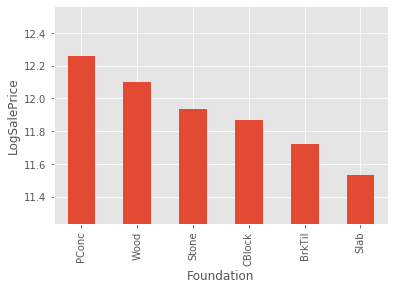

In [55]:
categorical(train_df, "Foundation")

# Variable 30: BasmtQual
    - Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

Missing Values Count:  0

Unique values and frequency:
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

Mean LogSalePrice in different groups of BsmtQual


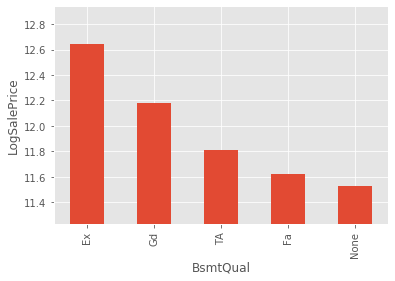

In [56]:
x = cat_null_convert(train_df, 'BsmtQual')
categorical(x, "BsmtQual")

# Variable 31: BsmtCond
    - Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

Missing Values Count:  0

Unique values and frequency:
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

Mean LogSalePrice in different groups of BsmtCond


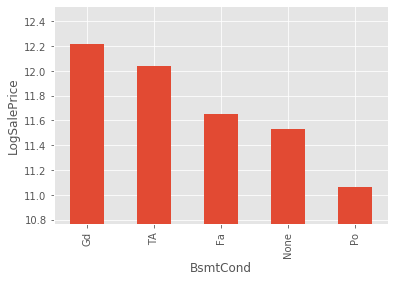

In [57]:
y = cat_null_convert(train_df, 'BsmtCond')
categorical(y, "BsmtCond")

# Variable 32: BsmtExposure
    - Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Missing Values Count:  0

Unique values and frequency:
No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

Mean LogSalePrice in different groups of BsmtExposure


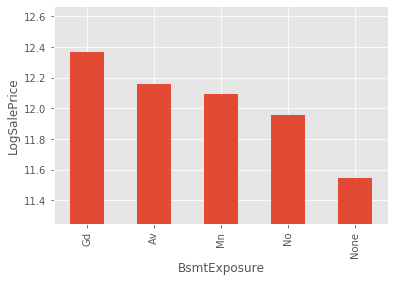

In [58]:
z = cat_null_convert(train_df, 'BsmtExposure')
categorical(z, "BsmtExposure")

# Variable 33: BsmtFinType1
    - Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Missing Values Count:  0

Unique values and frequency:
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

Mean LogSalePrice in different groups of BsmtFinType1


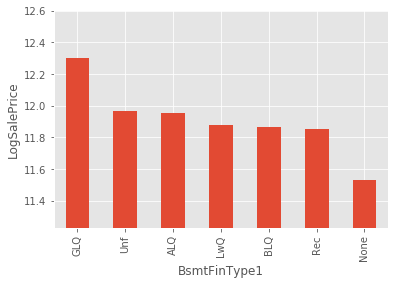

In [59]:
categorical(train_df, "BsmtFinType1")

# Variable 34: BsmtFinSF1
    - Type 1 finished square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

Number of outliers removed:1

Correlation with LogSalePrice before and after removing outliers are: 0.37 and 0.39, respectively.


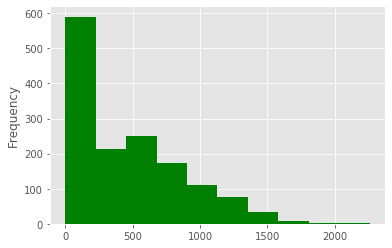

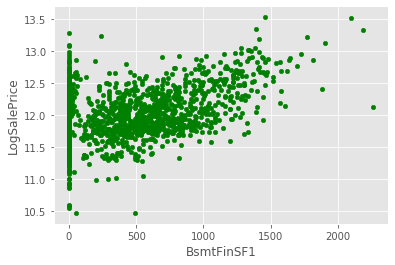

In [60]:
continuous(train_df, "BsmtFinSF1")

# Variable 35: BsmtFinType2
    - Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Missing Values Count:  0

Unique values and frequency:
Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64

Mean LogSalePrice in different groups of BsmtFinType2


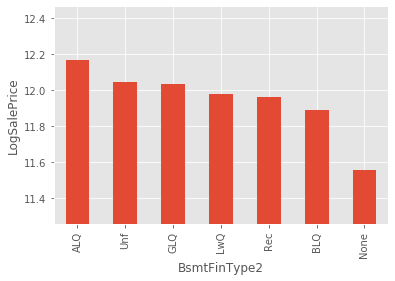

In [61]:
categorical(train_df, "BsmtFinType2")

# Variable 36: BsmtFinSF2
    - Type 2 finished square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

Number of outliers removed:25

Correlation with LogSalePrice before and after removing outliers are: 0.00 and -0.05, respectively.


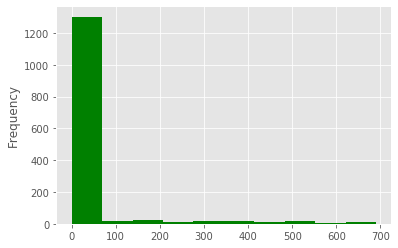

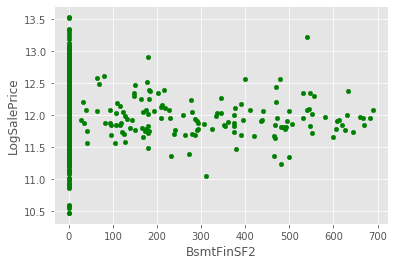

In [62]:
continuous(train_df, "BsmtFinSF2")

# Variable 37: BsmtUnfSF
    - Unfinished square feet of basement area

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

Number of outliers removed:1

Correlation with LogSalePrice before and after removing outliers are: 0.22 and 0.22, respectively.


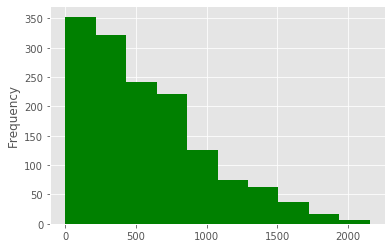

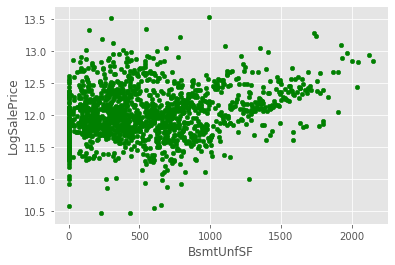

In [63]:
continuous(train_df, "BsmtUnfSF")

# Variable 38: TotalBsmtSF
    - Total square feet of basement area

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

Number of outliers removed:5

Correlation with LogSalePrice before and after removing outliers are: 0.61 and 0.65, respectively.


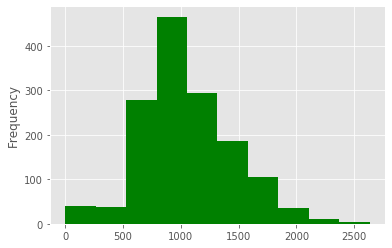

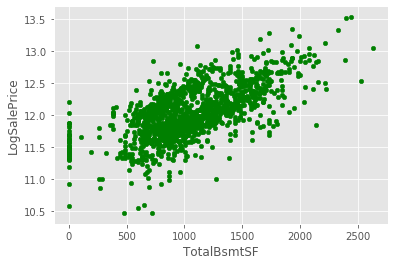

In [64]:
continuous(train_df, "TotalBsmtSF")

# Variable 39: Heating
    - Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Missing Values Count:  0

Unique values and frequency:
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Mean LogSalePrice in different groups of Heating


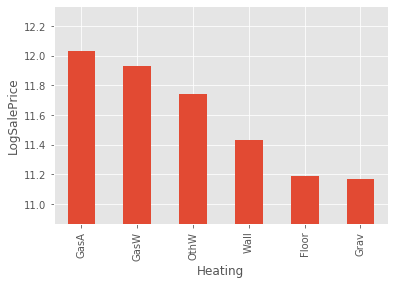

In [65]:
categorical(train_df, "Heating")

# Variable 40: HeatingQC
    - Heating quality and condition

Missing Values Count:  0

Unique values and frequency:
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

Mean LogSalePrice in different groups of HeatingQC


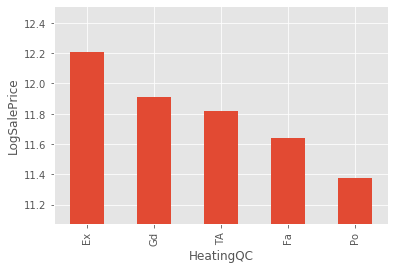

In [66]:
categorical(train_df, "HeatingQC")

# Variable 41: CentralAir
    - central air present - binary value

Missing Values Count:  0

Unique values and frequency:
1    1365
0      95
Name: CentralAir, dtype: int64

Mean LogSalePrice in different groups of CentralAir


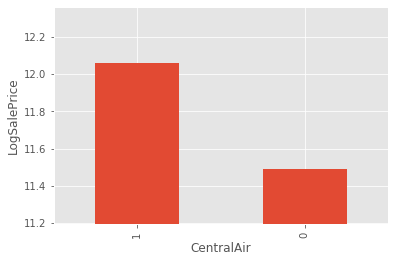

In [67]:
categorical(train_df, "CentralAir")

# Variable 42: Electrical
    - Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

Missing Values Count:  1

Unique values and frequency:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Mean LogSalePrice in different groups of Electrical


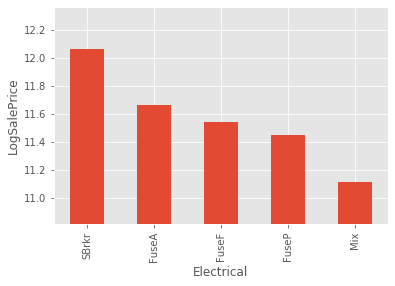

In [68]:
categorical(train_df, "Electrical")

# Variable 43: 1stFlrSF
    - first floor area in square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

Number of outliers removed:4

Correlation with LogSalePrice before and after removing outliers are: 0.60 and 0.62, respectively.


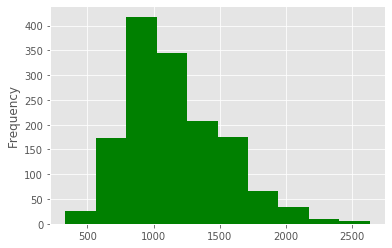

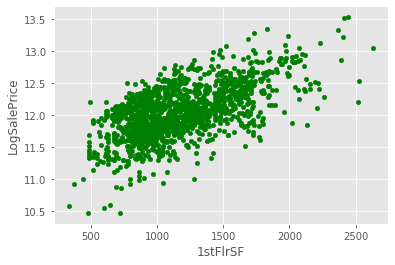

In [69]:
continuous(train_df, "1stFlrSF")

# Variable 44: 2ndFlrSF
    - second floor area in squared feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

Number of outliers removed:0

Correlation with LogSalePrice before and after removing outliers are: 0.32 and 0.32, respectively.


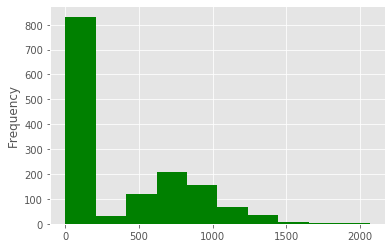

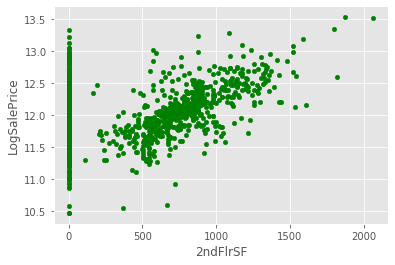

In [70]:
continuous(train_df, "2ndFlrSF")

# Variable 45: LowQualFinSF
    - Low quality finished square feet (all floors)

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

Number of outliers removed:19

Correlation with LogSalePrice before and after removing outliers are: -0.04 and -0.05, respectively.


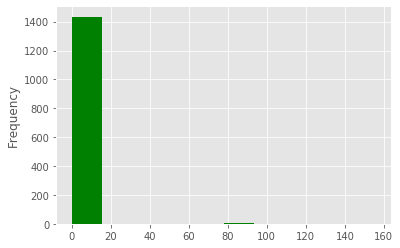

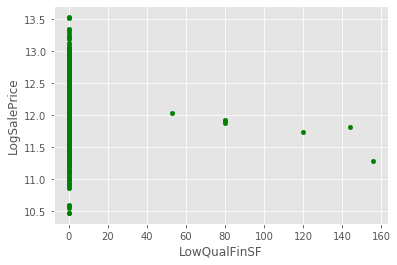

In [71]:
continuous(train_df, "LowQualFinSF")

# Variable 46: GrLivArea
    - Above grade (ground) living area square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

Number of outliers removed:5

Correlation with LogSalePrice before and after removing outliers are: 0.70 and 0.72, respectively.


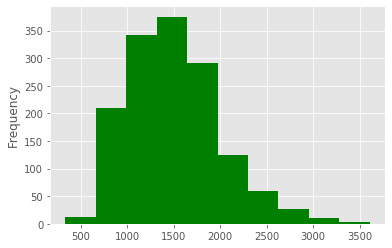

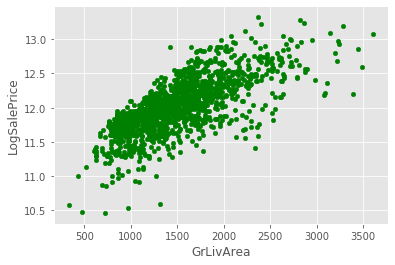

In [72]:
continuous(train_df, "GrLivArea")

# Variable 47: BsmtFullBath
    - Basement full bathrooms

Missing Values Count:  0

Unique values and frequency:
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

Mean LogSalePrice in different groups of BsmtFullBath


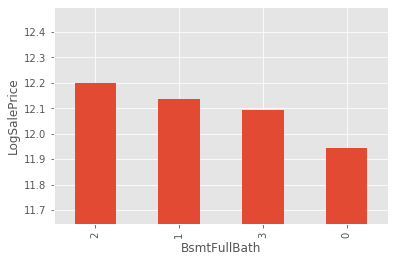

In [73]:
categorical(train_df, "BsmtFullBath")

# Variable 48: BsmtHalfBath
    - Basement half bathrooms

Missing Values Count:  0

Unique values and frequency:
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

Mean LogSalePrice in different groups of BsmtHalfBath


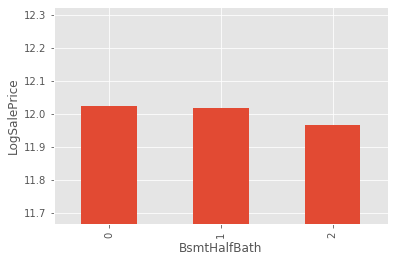

In [74]:
categorical(train_df, "BsmtHalfBath")

# Variable 49: FullBath
    - Full bathrooms above grade

Missing Values Count:  0

Unique values and frequency:
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

Mean LogSalePrice in different groups of FullBath


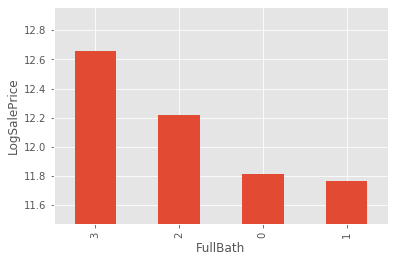

In [75]:
categorical(train_df, "FullBath")

# Variable 50: HalfBath
    - Half baths above grade

Missing Values Count:  0

Unique values and frequency:
0    913
1    535
2     12
Name: HalfBath, dtype: int64

Mean LogSalePrice in different groups of HalfBath


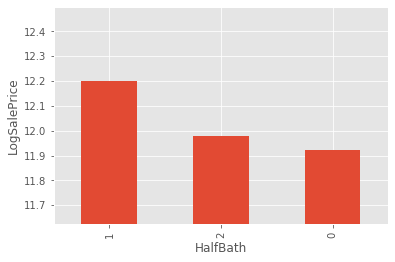

In [76]:
categorical(train_df, "HalfBath")

# Variable 51: BedroomAbvGr
    - Bedrooms above grade (does NOT include basement bedrooms)

Missing Values Count:  0

Unique values and frequency:
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

Mean LogSalePrice in different groups of BedroomAbvGr


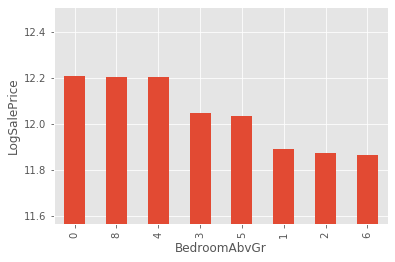

In [77]:
categorical(train_df, "BedroomAbvGr")

# Variable 52: KitchenAbvGr
    - Kitchens above grade

Missing Values Count:  0

Unique values and frequency:
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

Mean LogSalePrice in different groups of KitchenAbvGr


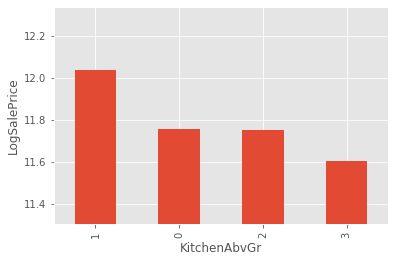

In [78]:
categorical(train_df, "KitchenAbvGr")

# Variable 53: KitchenQual
    - quality of kitchen

Missing Values Count:  0

Unique values and frequency:
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

Mean LogSalePrice in different groups of KitchenQual


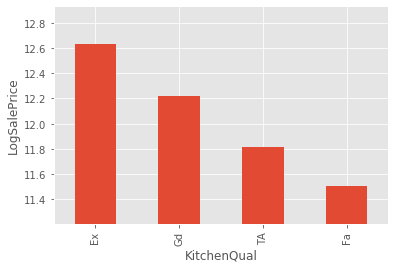

In [79]:
categorical(train_df, "KitchenQual")

# Variable 54: TotRmsAbvGrd
    - Total rooms above grade (does not include bathrooms)

Missing Values Count:  0

Unique values and frequency:
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

Mean LogSalePrice in different groups of TotRmsAbvGrd


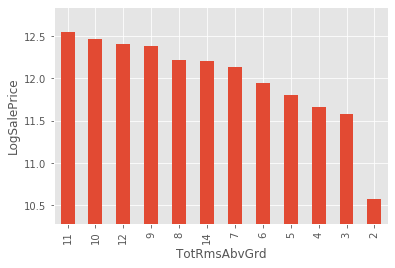

In [80]:
categorical(train_df, "TotRmsAbvGrd")

# Variable 55: Functional
    - Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Missing Values Count:  0

Unique values and frequency:
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

Mean LogSalePrice in different groups of Functional


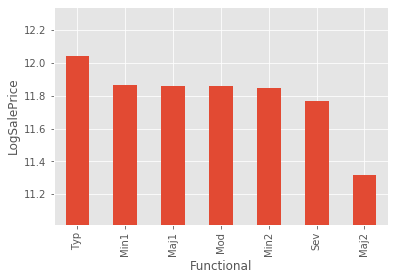

In [81]:
categorical(train_df, "Functional")

# Variable 56: Fireplaces
    - Number of fireplaces

Missing Values Count:  0

Unique values and frequency:
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

Mean LogSalePrice in different groups of Fireplaces


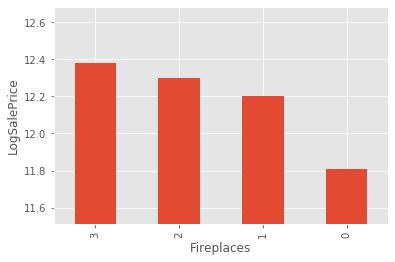

In [82]:
categorical(train_df, "Fireplaces")

# Variable 57: FireplaceQu
    - Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Missing Values Count:  0

Unique values and frequency:
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

Mean LogSalePrice in different groups of FireplaceQu


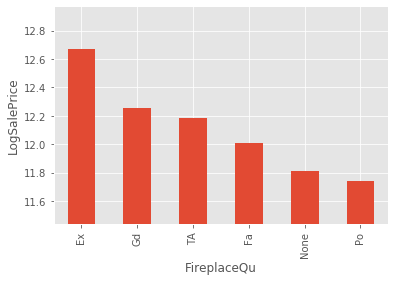

In [83]:
a = cat_null_convert(train_df, 'FireplaceQu')
categorical(a, "FireplaceQu")

# Variable 58: GarageType
    - Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Missing Values Count:  81

Unique values and frequency:
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Mean LogSalePrice in different groups of GarageType


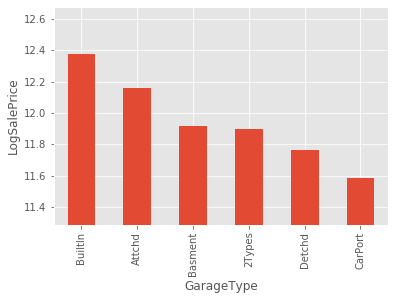

In [84]:
categorical(train_df, "GarageType")

# Variable 59: GarageYrBlt
    - year garage built

Missing Values Count:  81

Statistical summary:
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Number of outliers removed:0

Correlation with LogSalePrice before and after removing outliers are: 0.54 and 0.54, respectively.


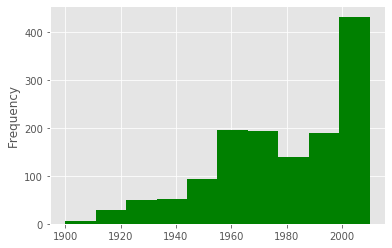

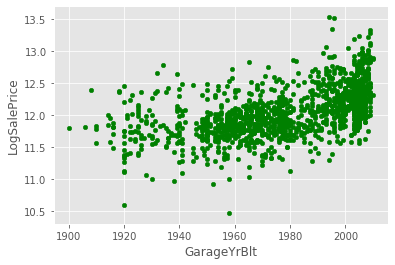

In [85]:
continuous(train_df, "GarageYrBlt")

# Variable 60: GarageFinish
    - Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Missing Values Count:  81

Unique values and frequency:
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

Mean LogSalePrice in different groups of GarageFinish


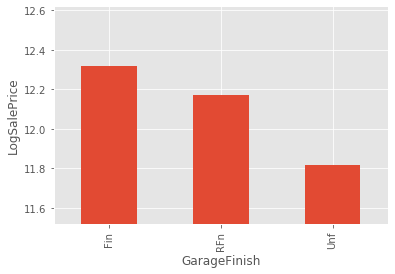

In [86]:
categorical(train_df, "GarageFinish")

# Variable 61: GarageCars
    - Size of garage in car capacity

Missing Values Count:  0

Unique values and frequency:
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

Mean LogSalePrice in different groups of GarageCars


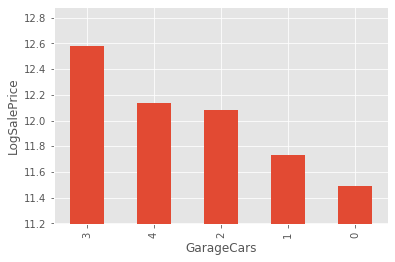

In [87]:
categorical(train_df, "GarageCars")

# Variable 62: GarageArea
    - Size of garage in square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

Number of outliers removed:3

Correlation with LogSalePrice before and after removing outliers are: 0.65 and 0.66, respectively.


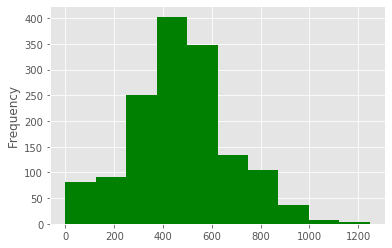

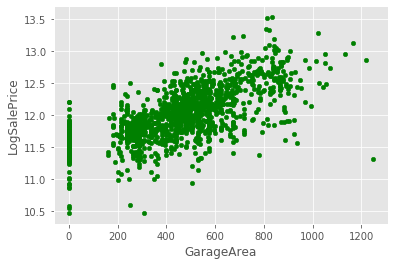

In [88]:
continuous(train_df, "GarageArea")

# Variable 63: GarageQual
    - quality of garage

Missing Values Count:  0

Unique values and frequency:
TA      1311
None      81
Fa        48
Gd        14
Po         3
Ex         3
Name: GarageQual, dtype: int64

Mean LogSalePrice in different groups of GarageQual


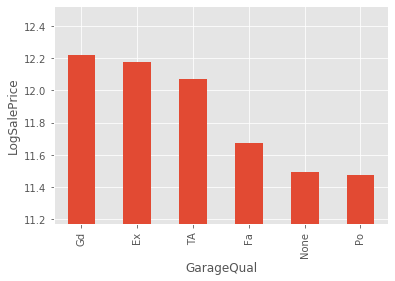

In [89]:
b = cat_null_convert(train_df, 'GarageQual')
categorical(b, 'GarageQual')

# Variable 64: GarageCond
    - condition of garage

Missing Values Count:  0

Unique values and frequency:
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

Mean LogSalePrice in different groups of GarageCond


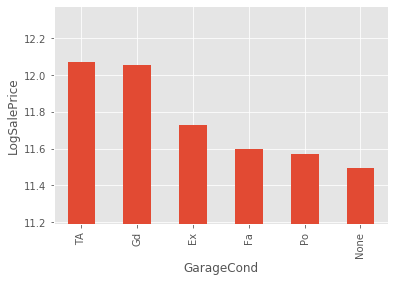

In [90]:
c = cat_null_convert(train_df, 'GarageCond')
categorical(c, 'GarageCond')

# Variable 65: PavedDrive
    - Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

Missing Values Count:  0

Unique values and frequency:
1    1340
0     120
Name: PavedDrive, dtype: int64

Mean LogSalePrice in different groups of PavedDrive


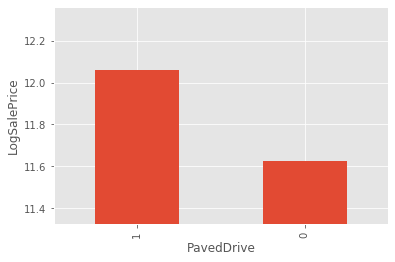

In [91]:
categorical(train_df, "PavedDrive")

# Variable 66: WoodDeckSF
    - Wood deck area in square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

Number of outliers removed:6

Correlation with LogSalePrice before and after removing outliers are: 0.33 and 0.34, respectively.


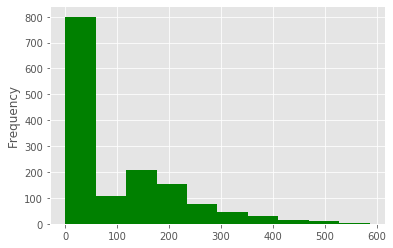

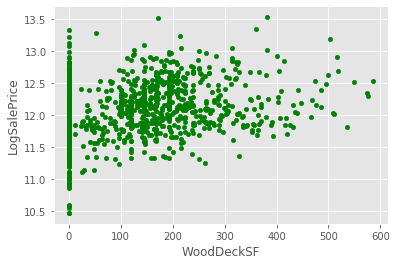

In [92]:
continuous(train_df, "WoodDeckSF")

# Variable 67: OpenPorchSF
    - Open porch area in square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

Number of outliers removed:10

Correlation with LogSalePrice before and after removing outliers are: 0.32 and 0.37, respectively.


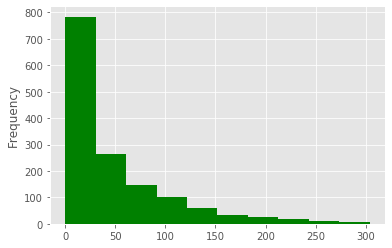

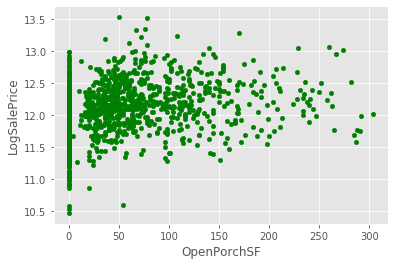

In [93]:
continuous(train_df, "OpenPorchSF")

# Variable 68: EnclosedPorch
    - Enclosed porch area in square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

Number of outliers removed:13

Correlation with LogSalePrice before and after removing outliers are: -0.15 and -0.18, respectively.


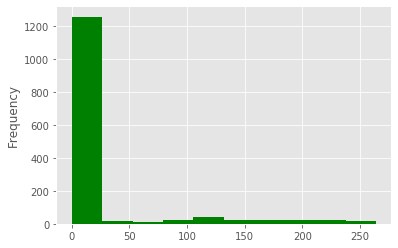

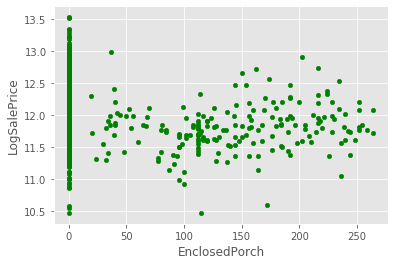

In [94]:
continuous(train_df, "EnclosedPorch")

# Variable 69: 3SsnPorch
    - Three season porch area in square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

Number of outliers removed:22

Correlation with LogSalePrice before and after removing outliers are: 0.05 and 0.01, respectively.


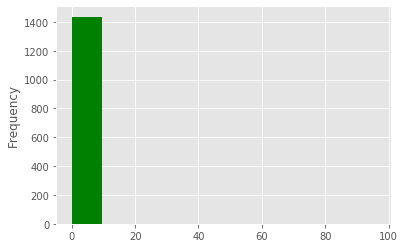

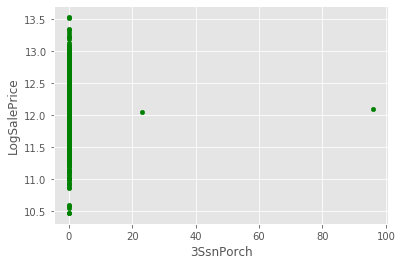

In [95]:
continuous(train_df, "3SsnPorch")

# Variable 70: ScreenPorch
    - Screen porch area in square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

Number of outliers removed:22

Correlation with LogSalePrice before and after removing outliers are: 0.12 and 0.10, respectively.


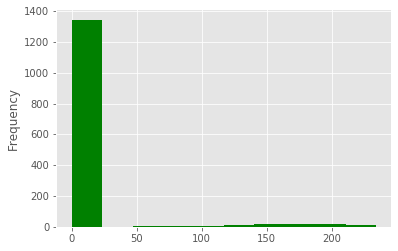

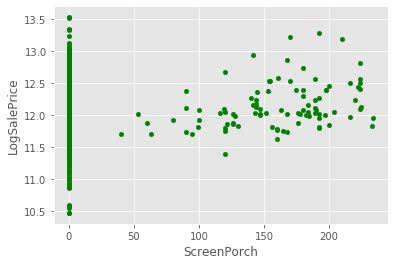

In [96]:
continuous(train_df, "ScreenPorch")

# Variable 71: PoolArea
    - Pool area in square feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

Number of outliers removed:7

Correlation with LogSalePrice before and after removing outliers are: 0.07 and nan, respectively.


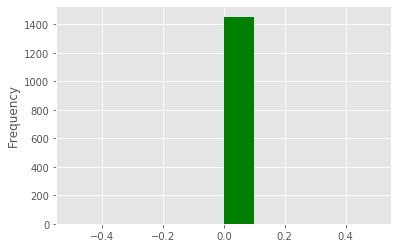

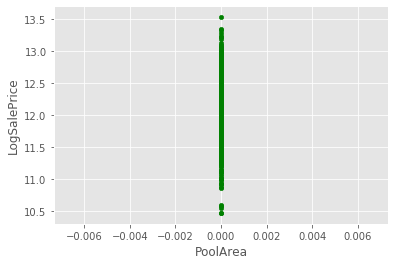

In [97]:
continuous(train_df, "PoolArea")

# Variable 72: PoolQC
    - Pool quality

Missing Values Count:  1453

Unique values and frequency:
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

Mean LogSalePrice in different groups of PoolQC


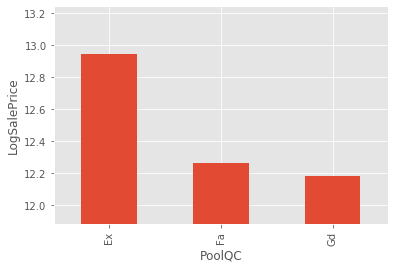

In [98]:
categorical(train_df, "PoolQC")

# Variable 73: Fence
    - Fence Quality

Missing Values Count:  1179

Unique values and frequency:
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Mean LogSalePrice in different groups of Fence


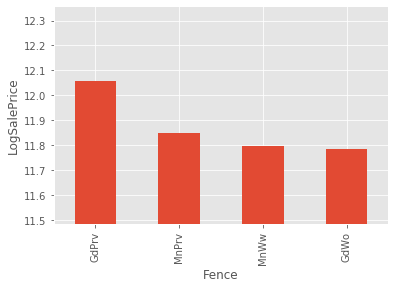

In [99]:
categorical(train_df, "Fence")

# Variable 74: MiscFeature
    - Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [100]:
#categorical(train_df, "MiscFeature")

# Variable 76: MiscVal
    - $Value of miscellaneous featuredv

Missing Values Count:  0

Statistical summary:
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

Number of outliers removed:4

Correlation with LogSalePrice before and after removing outliers are: -0.02 and -0.03, respectively.


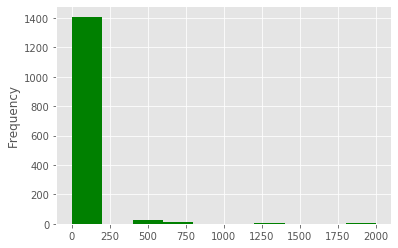

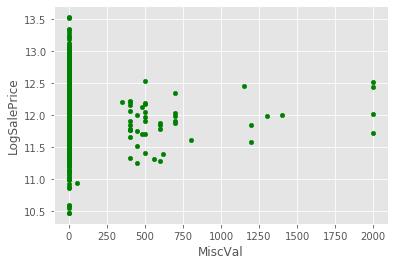

In [101]:
continuous(train_df, "MiscVal")

# Variable 77: MoSold
    - Month Sold (MM)

Missing Values Count:  0

Unique values and frequency:
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

Mean LogSalePrice in different groups of MoSold


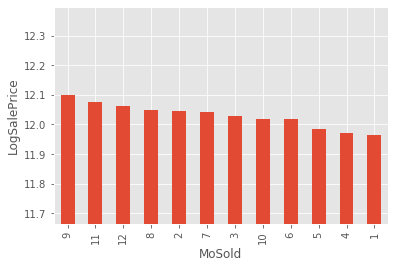

In [102]:
categorical(train_df, "MoSold")

# Variable 78: YrSold
    - Year Sold (YYYY)

Missing Values Count:  0

Unique values and frequency:
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

Mean LogSalePrice in different groups of YrSold


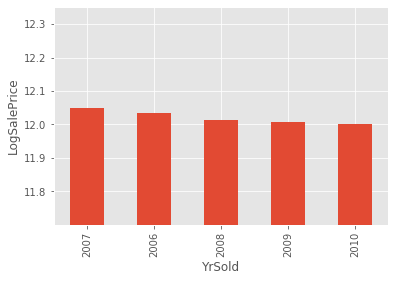

In [103]:
categorical(train_df, "YrSold")

# Variable 79: SaleType
    - Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

Missing Values Count:  0

Unique values and frequency:
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

Mean LogSalePrice in different groups of SaleType


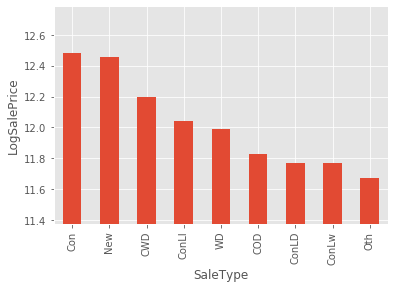

In [104]:
categorical(train_df, "SaleType")

# Variable 80: SaleCondition
    - SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Missing Values Count:  0

Unique values and frequency:
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Mean LogSalePrice in different groups of SaleCondition


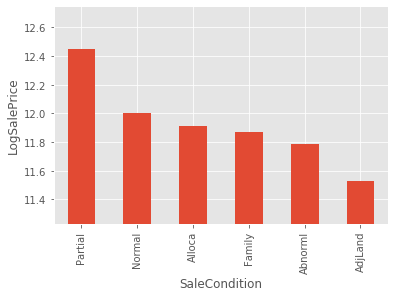

In [105]:
categorical(train_df, "SaleCondition")

# Variable 81: SalePrice

Missing Values Count:  0

Statistical summary:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Number of outliers removed:9

Correlation with LogSalePrice before and after removing outliers are: 0.95 and 0.96, respectively.


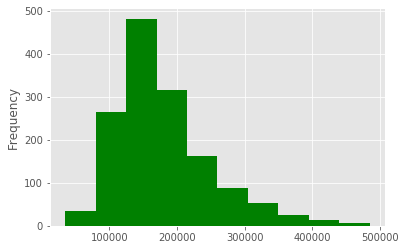

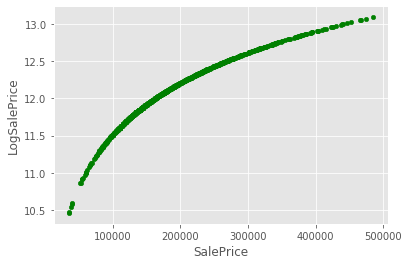

In [106]:
continuous(train_df, "SalePrice")

# Variable 82: Total_OutdoorSF
    - Total outdoor area squared feet

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean      181.329452
std       156.656097
min         0.000000
25%        45.000000
50%       164.000000
75%       266.000000
max      1027.000000
Name: Total_OutdoorSF, dtype: float64

Number of outliers removed:4

Correlation with LogSalePrice before and after removing outliers are: 0.40 and 0.39, respectively.


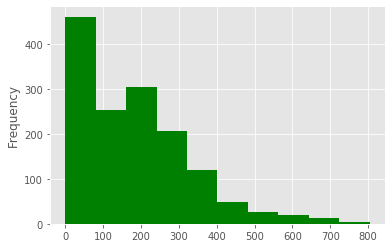

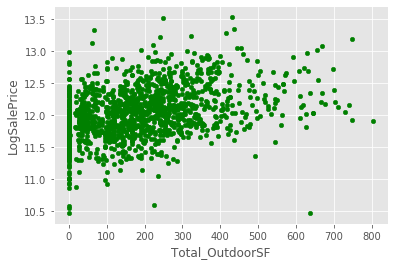

In [107]:
continuous(train_df, "Total_OutdoorSF")

# Variable 85: LogSalePrice

Missing Values Count:  0

Statistical summary:
count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: LogSalePrice, dtype: float64

Number of outliers removed:0

Correlation with LogSalePrice before and after removing outliers are: 1.00 and 1.00, respectively.


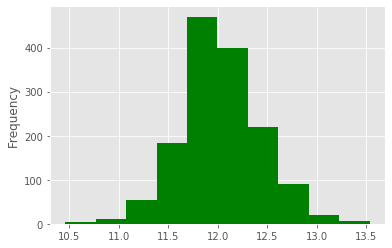

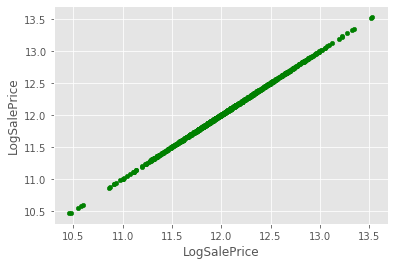

In [108]:
continuous(train_df, "LogSalePrice")